<a href="https://colab.research.google.com/github/CharlesPrado23/Bootcamp2oSemestre2021/blob/main/Semana8/Semana8(Classifiers).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<h2> <center> Machine Learning  <center> </h2>

<h2> <center>O que é ? Aonde é aplicado ? </h2>

<h3>Machine learning is a subset of AI that uses computer algorithms to analyze data and make intelligent decisions based on what it is learned without being explicitly programmed. Machine learning algorithms are trained with large sets of data and they learn from examples. They do not follow rules-based algorithms. Machine learning is what enables machines to solve problems on their own and make accurate predictions using the provided data.</h3>

<h2><center> K-NN (K Nearest Neighbor) </h2>

<h3> <center>
    
    
    
•	 Amongst the simplest of all machine learning
algorithms. No eXplicit training or model.
    
•	 Can be used both for classifcaton and
regression.
    
•	 Use XIs K-Nearest Neighbors to vote on what
XIs label should be. </h3>

<h2><center> Classification Problem </h2>

<h3><center>Classify using the majority vote of the k closest training points</h3>


<h3>For regression: the value for the test example
becomes the (weighted) average of the values
of the K neighbors. </h3>

<h3> 
    
The K-NN working can be explained on the basis of the below algorithm:

Step-1: Select the number K of the neighbors

Step-2: Calculate the Euclidean distance of K number of neighbors

Step-3: Take the K nearest neighbors as per the calculated Euclidean distance.

Step-4: Among these k neighbors, count the number of the data points in each category.

Step-5: Assign the new data points to that category for which the number of the neighbor is maximum.

Step-6: Our model is ready.</h3>

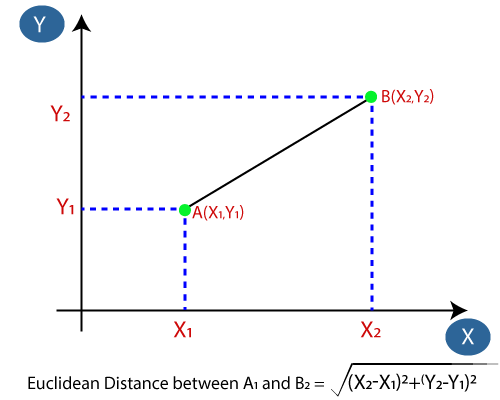

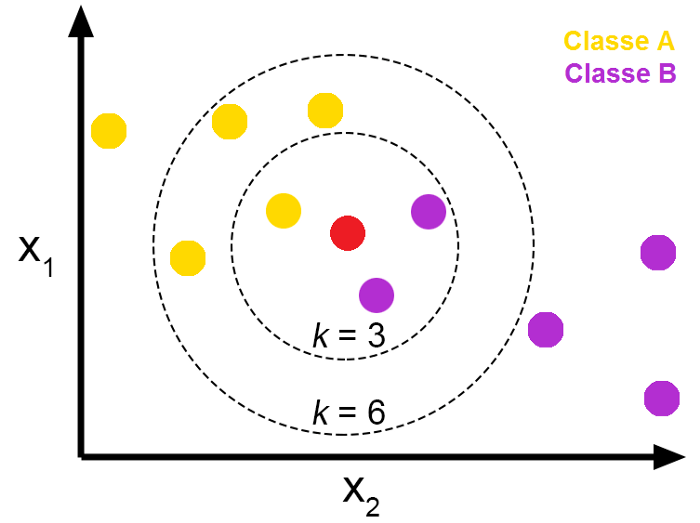

<h3><center>Diagrama de Voronoi<h3>

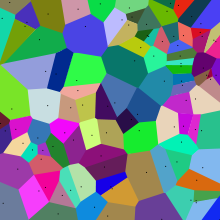

<h2> <center> Algumas Métricas para problemas de Classificação </h2> 

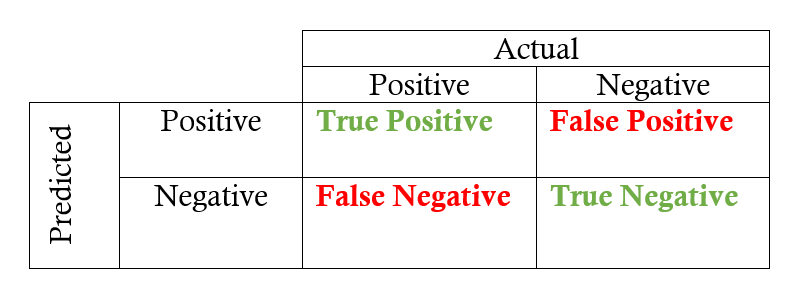

<h2> <center> Accuracy = (TP+TN)/(TP+FP+FN+TN) <h2>

<h2> <center> Precision = (TP)/(TP+FP)<h2>

<h2> <center> Recall = (TP)/(TP+FN) <h2>

In [1]:
from sklearn import datasets
import pandas as pd
import numpy as np



In [2]:
#Load dataset
wine = datasets.load_wine()
wine

{'DESCR': '.. _wine_dataset:\n\nWine recognition dataset\n------------------------\n\n**Data Set Characteristics:**\n\n    :Number of Instances: 178 (50 in each of three classes)\n    :Number of Attributes: 13 numeric, predictive attributes and the class\n    :Attribute Information:\n \t\t- Alcohol\n \t\t- Malic acid\n \t\t- Ash\n\t\t- Alcalinity of ash  \n \t\t- Magnesium\n\t\t- Total phenols\n \t\t- Flavanoids\n \t\t- Nonflavanoid phenols\n \t\t- Proanthocyanins\n\t\t- Color intensity\n \t\t- Hue\n \t\t- OD280/OD315 of diluted wines\n \t\t- Proline\n\n    - class:\n            - class_0\n            - class_1\n            - class_2\n\t\t\n    :Summary Statistics:\n    \n    ============================= ==== ===== ======= =====\n                                   Min   Max   Mean     SD\n    ============================= ==== ===== ======= =====\n    Alcohol:                      11.0  14.8    13.0   0.8\n    Malic Acid:                   0.74  5.80    2.34  1.12\n    Ash:           

In [3]:
df_data = pd.DataFrame(data= np.c_[wine['data'], wine['target']],
                     columns= wine['feature_names'] + ['target'])

In [4]:
df_data

alcohol  malic_acid   ash  ...  od280/od315_of_diluted_wines  proline  target
0      14.23        1.71  2.43  ...                          3.92   1065.0     0.0
1      13.20        1.78  2.14  ...                          3.40   1050.0     0.0
2      13.16        2.36  2.67  ...                          3.17   1185.0     0.0
3      14.37        1.95  2.50  ...                          3.45   1480.0     0.0
4      13.24        2.59  2.87  ...                          2.93    735.0     0.0
..       ...         ...   ...  ...                           ...      ...     ...
173    13.71        5.65  2.45  ...                          1.74    740.0     2.0
174    13.40        3.91  2.48  ...                          1.56    750.0     2.0
175    13.27        4.28  2.26  ...                          1.56    835.0     2.0
176    13.17        2.59  2.37  ...                          1.62    840.0     2.0
177    14.13        4.10  2.74  ...                          1.60    560.0     2.0

[178 rows x 14 columns]

In [ ]:
#from sklearn.preprocessing import StandardScaler
#scaler = StandardScaler()
#scaler.fit(wine.data)
#wine_T = scaler.transform(wine.data)
#wine_T = wine.data

In [5]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(wine.data, wine.target, test_size=0.2,random_state=3)

In [6]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(X_train)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

In [7]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=3)

In [8]:
knn.fit(X_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=3, p=2,
                     weights='uniform')

In [9]:
y_pred = knn.predict(X_test)
y_pred

array([0, 0, 0, 1, 2, 0, 0, 1, 1, 0, 1, 0, 1, 1, 0, 0, 1, 0, 2, 2, 0, 2,
       0, 2, 0, 1, 0, 0, 1, 2, 1, 0, 2, 1, 1, 2])

In [10]:
from sklearn.metrics import r2_score
from sklearn import metrics
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.9444444444444444


In [ ]:
y_test

array([1, 2, 0, 1, 1, 1, 2, 1, 1, 2, 0, 2, 1, 1, 0, 1, 1, 0, 0, 2, 2, 0,
       1, 0, 2, 1, 0, 2, 1, 1, 1, 1, 2, 1, 0, 0])

In [11]:
from sklearn.model_selection import cross_val_score
scores = cross_val_score(knn, X_train,y_train, cv=10)
scores

array([0.93333333, 1.        , 0.85714286, 1.        , 0.85714286,
       1.        , 1.        , 1.        , 1.        , 1.        ])

In [12]:
print("%0.2f accuracy with a standard deviation of %0.2f" % (scores.mean(), scores.std()))

0.96 accuracy with a standard deviation of 0.06


<h2><center> Decision Tree </h2>
   
<h3><center>  Tree-like model of decisions </h3>   
    
    
    

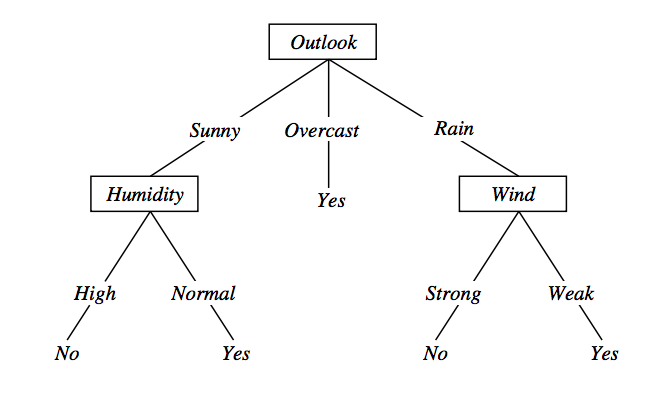

<h2><center>Representação de uma árvore de decisão</h2> 
    
<h3>
    
Cada nó interno testa um atributo
    
Cada ramo corresponde ao valor do atributo
    
Cada nó folha atribui uma classificação
</h3>    

<h2><center>  Uso de árvores de decisão  </h2>
    
<h3>
    
Instâncias que podem ser descritas por atributos {pares de valores}

A função de destino tem valor discreto

Hipótese disjuntiva pode ser necessária

Dados de treinamento possivelmente ruidosos    
    
 </h3>   

<h2><center>  Algumas aplicações  </h2>
    
<h3>
    
Equipamento ou diagnóstico médico
    
Análise de risco de crédito
    
  
    
 </h3>   

<h3>

Loop principal:
    

1. A <- o melhor "atributo" de decisão para o próximo nó

        
2. Atribua A como atributo de decisão para o nó

        
3. Para cada valor de A, crie um novo nó abaixo 
        
        
4. Classifique os exemplos de treinamento para nós folha

        
5. Se os exemplos de treinamento forem perfeitamente classificados, então
STOP, senão iterar sobre o novo nó folha
        
        
</h3>        

<h2> <center> Como definir os melhores atributos  e por que ???</h2> 

<h3> <center> Entropia dos dados </h3>
     

image.png

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
df_social = pd.read_csv('/content/Social_Network_Ads.csv')
df_social.head()

User ID  Gender  Age  EstimatedSalary  Purchased
0  15624510    Male   19            19000          0
1  15810944    Male   35            20000          0
2  15668575  Female   26            43000          0
3  15603246  Female   27            57000          0
4  15804002    Male   19            76000          0

In [ ]:
df_social.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   User ID          400 non-null    int64 
 1   Gender           400 non-null    object
 2   Age              400 non-null    int64 
 3   EstimatedSalary  400 non-null    int64 
 4   Purchased        400 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 15.8+ KB


In [ ]:
from sklearn import preprocessing
le_sex = preprocessing.LabelEncoder()
le_sex.fit(['Male','Female'])
df_social[['Gender']] = le_sex.transform(df_social.Gender) 

In [ ]:
df_social.head()


User ID  Gender  Age  EstimatedSalary  Purchased
0  15624510       1   19            19000          0
1  15810944       1   35            20000          0
2  15668575       0   26            43000          0
3  15603246       0   27            57000          0
4  15804002       1   19            76000          0

In [ ]:
X=df_social[['Age','EstimatedSalary']]

In [ ]:
y = df_social.Purchased


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1)

In [ ]:
from sklearn.tree import DecisionTreeClassifier, plot_tree

In [ ]:
dTree = DecisionTreeClassifier(criterion="entropy", max_depth = 30)

In [ ]:
dTree = dTree.fit(X_train,y_train)

In [ ]:
yhat = dTree.predict(X_test)
yhat

array([0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 0, 1, 0, 1,
       1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0,
       1, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1,
       0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0,
       1, 0, 1, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1])

In [ ]:
#y_test

In [ ]:
from sklearn.metrics import r2_score
from sklearn import metrics
print("Accuracy Test:",metrics.accuracy_score(y_test, yhat))
print("Precision Test:",metrics.precision_score(y_test,yhat))
print("Recall Test:",metrics.recall_score(y_test,yhat))

Accuracy Test: 0.8083333333333333
Precision Test: 0.7659574468085106
Recall Test: 0.75


In [ ]:
yhat_train = dTree.predict(X_train)
print("Accuracy Train:",metrics.accuracy_score(y_train, yhat_train))
print("Precision Train:",metrics.precision_score(y_train,yhat_train))
print("Recall Train:",metrics.recall_score(y_train,yhat_train))

Accuracy Train: 0.9964285714285714
Precision Train: 1.0
Recall Train: 0.9894736842105263


In [ ]:
#plt.figure(figsize=(15,15))
#plot_tree(dTree)

In [ ]:
# pip install graphviz
import graphviz as grp
from sklearn import tree

dot_data = tree.export_graphviz(dTree, out_file=None) 
graph = grp.Source(dot_data) 
graph.render("Social") 

'Social.pdf'

In [ ]:
#!conda install -c conda-forge pydotplus -y
#!conda install -c conda-forge python-graphviz -y
from  io import StringIO
import pydotplus
import matplotlib.image as mpimg
from sklearn import tree
%matplotlib inline 

In [ ]:
dot_data = StringIO()
filename = "Purchasetree.png"
featureNames = X.columns[0:3]
out=tree.export_graphviz(dTree,feature_names=featureNames, out_file=dot_data, class_names= ['P0','P1'], filled=True,  special_characters=True,rotate=False)  
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
graph.write_png(filename)
img = mpimg.imread(filename)
plt.figure(figsize=(100, 200))
plt.imshow(img,interpolation='nearest')

In [ ]:
featureNames

Index(['Age', 'EstimatedSalary'], dtype='object')

In [ ]:
df_social.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype
---  ------           --------------  -----
 0   User ID          400 non-null    int64
 1   Gender           400 non-null    int64
 2   Age              400 non-null    int64
 3   EstimatedSalary  400 non-null    int64
 4   Purchased        400 non-null    int64
dtypes: int64(5)
memory usage: 15.8 KB


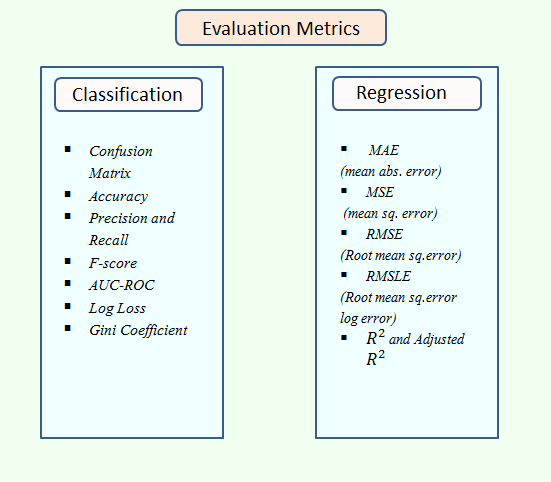

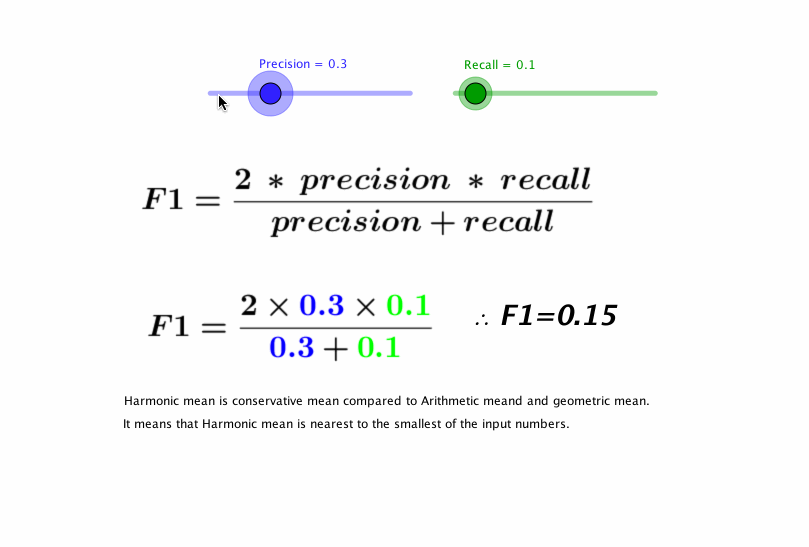

**REGRESSÃO LOGÍSTICA**

A regressão logística é uma técnica estatística que tem como objetivo produzir, a partir de um conjunto de observações, um modelo que permita a predição de valores tomados por uma variável categórica, frequentemente binária, a partir de uma série de variáveis explicativas contínuas e/ou binárias. (Ref.: Logistic Regression: Statnotes, from North Carolina State University, Public Administration Program) 

$
{\displaystyle \operatorname {logit} (p_{i})=\ln \left({\frac {p_{i}}{1-p_{i}}}\right)=\beta _{0}+\beta _{1}x_{1,i}+\cdots +\beta _{k}x_{k,i}.}
$

A regressão logística é utilizada em áreas como as seguintes:

1. Em medicina, permite por exemplo determinar os factores que caracterizam um grupo de indivíduos doentes em relação a indivíduos sãos.

2. No domínio dos seguros, permite encontrar fracções da clientela que sejam sensíveis a determinada política securitária em relação a um dado risco particular.

3. Em instituições financeiras, pode detectar os grupos de risco para a subscrição de um crédito.

4. Em econometria, permite explicar uma variável discreta, como por exemplo as intenções de voto eleitorais.





$$
ProbabilityOfaClass_1 =  P(Y=1|X) = \sigma({\theta^TX}) = \frac{e^{\theta^TX}}{1+e^{\theta^TX}} 
$$

image.png

In [ ]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
import pandas as pd
scaler = StandardScaler()

In [ ]:
df_social = pd.read_csv('/content/Social_Network_Ads.csv')
df_social.head()

User ID  Gender  Age  EstimatedSalary  Purchased
0  15624510    Male   19            19000          0
1  15810944    Male   35            20000          0
2  15668575  Female   26            43000          0
3  15603246  Female   27            57000          0
4  15804002    Male   19            76000          0

In [ ]:
X=df_social[['Age','EstimatedSalary']]

In [ ]:
y = df_social.Purchased


In [ ]:
#scaler.fit(X)
#X_T = scaler.transform(X)


In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.2, random_state=4)
print ('Train set:', X_train.shape,  y_train.shape)
print ('Test set:', X_test.shape,  y_test.shape)

Train set: (320, 2) (320,)
Test set: (80, 2) (80,)


In [ ]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(X_train)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix
LR = LogisticRegression(C=0.01, solver='liblinear').fit(X_train,y_train)
LR

LogisticRegression(C=0.01, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='liblinear', tol=0.0001, verbose=0,
                   warm_start=False)

In [ ]:
yhat = LR.predict(X_test)
yhat

array([0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0,
       0, 0, 1, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1])

In [ ]:
from sklearn.metrics import r2_score
from sklearn import metrics

print("Accuracy Test:",metrics.accuracy_score(y_test, yhat))
print("Precision Test:",metrics.precision_score(y_test,yhat))
print("Recall Test:",metrics.recall_score(y_test,yhat))

Accuracy Test: 0.8875
Precision Test: 0.7727272727272727
Recall Test: 0.8095238095238095


In [ ]:
y_proba = LR.predict_proba(X_test)
#y_proba

In [ ]:
import numpy as np
np.round(y_proba*100.0)[0:10]


array([[64., 36.],
       [66., 34.],
       [68., 32.],
       [60., 40.],
       [65., 35.],
       [40., 60.],
       [41., 59.],
       [25., 75.],
       [37., 63.],
       [59., 41.]])

image.png

https://towardsdatascience.com/logistic-regression-detailed-overview-46c4da4303bc

# **Regressão Logística - Multi-Classe**

In [ ]:
from sklearn import datasets

In [ ]:
#Load dataset
wine = datasets.load_wine()
wine

{'DESCR': '.. _wine_dataset:\n\nWine recognition dataset\n------------------------\n\n**Data Set Characteristics:**\n\n    :Number of Instances: 178 (50 in each of three classes)\n    :Number of Attributes: 13 numeric, predictive attributes and the class\n    :Attribute Information:\n \t\t- Alcohol\n \t\t- Malic acid\n \t\t- Ash\n\t\t- Alcalinity of ash  \n \t\t- Magnesium\n\t\t- Total phenols\n \t\t- Flavanoids\n \t\t- Nonflavanoid phenols\n \t\t- Proanthocyanins\n\t\t- Color intensity\n \t\t- Hue\n \t\t- OD280/OD315 of diluted wines\n \t\t- Proline\n\n    - class:\n            - class_0\n            - class_1\n            - class_2\n\t\t\n    :Summary Statistics:\n    \n    ============================= ==== ===== ======= =====\n                                   Min   Max   Mean     SD\n    ============================= ==== ===== ======= =====\n    Alcohol:                      11.0  14.8    13.0   0.8\n    Malic Acid:                   0.74  5.80    2.34  1.12\n    Ash:           

In [ ]:
#from sklearn.preprocessing import StandardScaler
#scaler = StandardScaler()
#scaler.fit(wine.data)
#wine_T = scaler.transform(wine.data)
#wine_T = wine.data

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(wine.data, wine.target, test_size=0.2,random_state=20)

In [ ]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(X_train)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

In [ ]:
LR = LogisticRegression(C=0.01, solver='liblinear').fit(X_train,y_train)

In [ ]:
yhat = LR.predict(X_test)
yhat

array([1, 2, 0, 1, 1, 1, 2, 1, 1, 2, 0, 2, 1, 1, 0, 1, 1, 0, 0, 2, 2, 0,
       1, 0, 2, 1, 0, 2, 1, 1, 2, 1, 2, 1, 0, 0])

In [ ]:
from sklearn.metrics import r2_score
from sklearn import metrics

print("Accuracy Test:",metrics.accuracy_score(y_test, yhat))
#print("Precision Test:",metrics.precision_score(y_test, yhat))


Accuracy Test: 0.9722222222222222


In [ ]:
y_proba = LR.predict_proba(X_test)

In [ ]:
import numpy as np
np.round(y_proba*100.0)[0:5]


array([[22., 52., 26.],
       [21., 15., 64.],
       [59., 23., 18.],
       [22., 43., 35.],
       [15., 51., 34.]])

In [ ]:
from sklearn.metrics import jaccard_score
jaccard_score(y_test, yhat, average=None)

array([1.        , 0.94117647, 0.9       ])

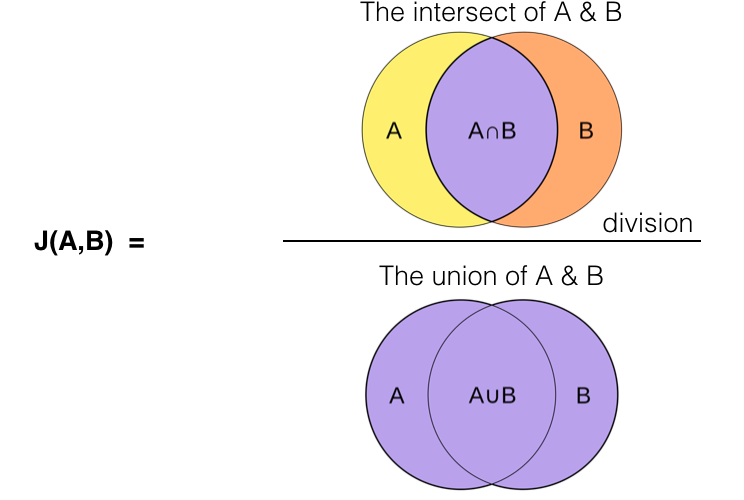

### <CENTER> **SUPPORT VECTOR MACHINE (SVM)** ###





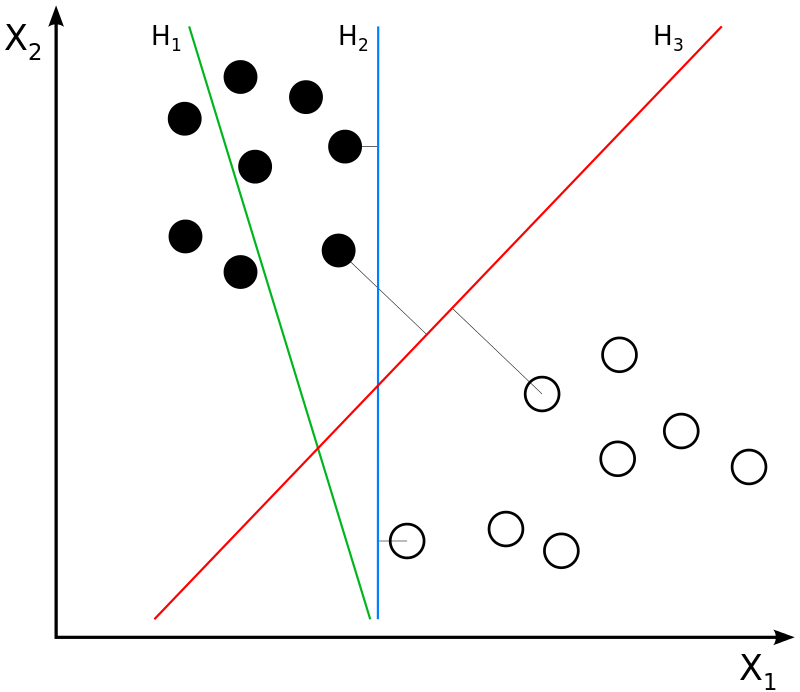

image.png

In [ ]:
from sklearn import svm
clf = svm.SVC(kernel='rbf')
clf.fit(X_train, y_train) 

SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [ ]:
yhat = clf.predict(X_test)
yhat 

array([0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0,
       1, 0, 0, 0, 1, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1])

In [ ]:
from sklearn.metrics import f1_score
f1_score(y_test, yhat, average='weighted') 

0.9269450800915333

In [ ]:
print("Accuracy:",metrics.accuracy_score(y_test, yhat))

Accuracy: 0.925


In [ ]:
from sklearn.metrics import classification_report, confusion_matrix
import itertools

In [ ]:
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

              precision    recall  f1-score   support

           0       0.98      0.92      0.95        59
           1       0.80      0.95      0.87        21

    accuracy                           0.93        80
   macro avg       0.89      0.93      0.91        80
weighted avg       0.93      0.93      0.93        80

Confusion matrix, without normalization
[[20  1]
 [ 5 54]]


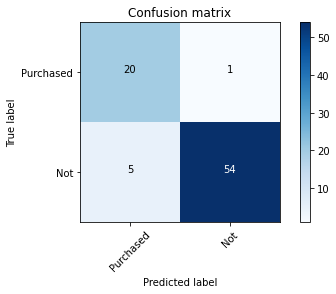

In [ ]:
cnf_matrix = confusion_matrix(y_test, yhat, labels=[1,0])
np.set_printoptions(precision=2)

print (classification_report(y_test, yhat))

# Plot non-normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=['Purchased','Not'],normalize= False,  title='Confusion matrix')